# Airbnb Project 

### By  your Name 

In [1]:
# step 1 : import libreries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_csv('AirBnb.csv')
data

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback
0,0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback
1,1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback
2,2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback
3,3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback
4,4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback
...,...,...,...,...,...,...,...,...,...,...,...
68396,68396,8536127,76394660,2016-05-27,72475516,Prakash D,We had smooth check in at Apartment. We were p...,Neutre,3.105417,2.846640,No Comeback
68397,68397,1956275,32160313,2015-05-15,4143054,Amith,Emmanuel was a very good host. Had booked the ...,Satisfait,3.518750,3.583337,Comeback
68398,68398,13062783,98728297,2016-09-01,31264160,Marina,Michael was extremely nice! From picking me up...,Satisfait,3.701389,4.019198,Comeback
68399,68399,798957,11675670,2014-04-11,3033862,Ajev,Ed \r\n\r\nAwesome stay ! Recommended 300% to ...,Très Satisfait,5.000000,4.148623,Comeback


In [3]:
# data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68401 entries, 0 to 68400
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              68401 non-null  int64  
 1   listing_id              68401 non-null  int64  
 2   id                      68401 non-null  int64  
 3   date                    68401 non-null  object 
 4   reviewer_id             68401 non-null  int64  
 5   reviewer_name           68401 non-null  object 
 6   comments                68348 non-null  object 
 7   Satisfaction_Livel      68401 non-null  object 
 8   Satisfaction_Score_5    68401 non-null  float64
 9   Recommandation_Score_5  68401 non-null  float64
 10  Comeback                68401 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 5.7+ MB


In [4]:
###  data dims*
data.shape

(68401, 11)

# Cleaning process

In [5]:
# drop columns
data = data.drop(['Unnamed: 0'], axis = 1)

In [6]:
data.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback'],
      dtype='object')

In [7]:
# to convert date column
data.date =  pd.to_datetime(data.date)
data["date"]

0       2013-05-21
1       2013-05-29
2       2013-06-06
3       2013-06-15
4       2013-06-16
           ...    
68396   2016-05-27
68397   2015-05-15
68398   2016-09-01
68399   2014-04-11
68400   2016-06-01
Name: date, Length: 68401, dtype: datetime64[ns]

In [8]:
# duplicates rows
duplicates = data[data.duplicated()]
duplicates.shape 

(126, 10)

In [9]:
data.shape

(68401, 10)

In [10]:
68401 - 126

68275

In [11]:
#remove duplicate rows
data = data.drop_duplicates()
data.shape

(68275, 10)

In [12]:
# list of missing values by column 
data.isnull().sum()

listing_id                 0
id                         0
date                       0
reviewer_id                0
reviewer_name              0
comments                  53
Satisfaction_Livel         0
Satisfaction_Score_5       0
Recommandation_Score_5     0
Comeback                   0
dtype: int64

In [13]:
data = data.dropna()
data.shape

(68222, 10)

In [14]:
# cerat final data frame 
df= data

# a) Sentiment Analytics

In [15]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback'],
      dtype='object')

In [16]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback


In [17]:
from textblob import TextBlob

# Define a function to get polarity
def get_polarity(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply the function to create a polarity column
df['polarity'] = df['comments'].apply(get_polarity)

# Display the updated DataFrame with the new polarity column
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667


In [18]:
data.isna().sum()

listing_id                0
id                        0
date                      0
reviewer_id               0
reviewer_name             0
comments                  0
Satisfaction_Livel        0
Satisfaction_Score_5      0
Recommandation_Score_5    0
Comeback                  0
polarity                  0
dtype: int64

In [19]:
data.describe()

,listing_id,id,date,reviewer_id,Satisfaction_Score_5,Recommandation_Score_5,polarity
count,6.822200e+04,6.822200e+04,68222,6.822200e+04,68222.000000,68222.000000,68222.000000
mean,4.758567e+06,5.244331e+07,2015-08-17 06:56:48.659963136,2.800719e+07,3.424243,3.052349,0.369697
min,3.353000e+03,1.021000e+03,2009-03-21 00:00:00,1.430000e+02,0.000000,0.305247,-1.000000
25%,1.458081e+06,3.009459e+07,2015-04-17 00:00:00,8.996002e+06,3.142361,2.541126,0.256944
50%,4.080000e+06,5.221266e+07,2015-10-27 00:00:00,2.304320e+07,3.421875,3.050393,0.368750
75%,7.377034e+06,7.661062e+07,2016-05-28 00:00:00,4.211226e+07,3.708333,3.563482,0.483333
max,1.484378e+07,9.999045e+07,2016-09-06 00:00:00,9.335034e+07,5.000000,4.989529,1.000000
std,3.787699e+06,2.789821e+07,NaN,2.232693e+07,0.497650,0.651782,0.199060


In [21]:
# Define the bins and labels
bins = [-1.1,  -0.5,   0,   0.5,  1.1]
labels = [   1,    2,   3,     4]

# Create the 'polarity_level' column based on the bins and labels
df['polarity_level'] = pd.cut(df['polarity'], 
                                bins=bins, 
                                labels=labels)
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521,3
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68222 entries, 0 to 68274
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   listing_id              68222 non-null  int64         
 1   id                      68222 non-null  int64         
 2   date                    68222 non-null  datetime64[ns]
 3   reviewer_id             68222 non-null  int64         
 4   reviewer_name           68222 non-null  object        
 5   comments                68222 non-null  object        
 6   Satisfaction_Livel      68222 non-null  object        
 7   Satisfaction_Score_5    68222 non-null  float64       
 8   Recommandation_Score_5  68222 non-null  float64       
 9   Comeback                68222 non-null  object        
 10  polarity                68222 non-null  float64       
 11  polarity_level          68222 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int6

In [23]:
len(df.listing_id.unique())

2829

In [24]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521,3
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3
...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,No Comeback,0.000000,2
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,No Comeback,0.218483,3
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,Comeback,0.381515,3
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,No Comeback,0.328030,3


In [25]:
#  average sentiment score for each host

In [26]:
# average sentiment score for each host
sent_host = pd.pivot_table( df, 
                            values = "polarity", 
                            index =  "listing_id").reset_index()
sent_host = sent_host.sort_values(by='polarity', ascending=False).head(20)
sent_host

,listing_id,polarity
2219,12368082,1.000000
2505,13477535,1.000000
2539,13586128,1.000000
2524,13532311,1.000000
1778,9470342,0.968750
51,54487,0.900000
1983,10860611,0.875000
1822,9723217,0.800000
859,4759640,0.800000
2730,14336348,0.800000


In [27]:
# average sentiment score for each host
Nber_host = pd.pivot_table( data, 
                            values = "reviewer_id", 
                            index =  "listing_id" ,
                            aggfunc='nunique').reset_index()

Nber_host

,listing_id,reviewer_id
0,3353,34
1,5506,36
2,6695,47
3,6976,37
4,8792,18
...,...,...
2824,14813006,1
2825,14823724,1
2826,14842237,1
2827,14843050,2


# Analysis of negative reviews: Identify recurring points 
# in negative reviews to understand sources of dissatisfaction

In [28]:
df_neg = df[df["polarity"]< 0 ]
df_neg

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level
20,1178162,11901870,2014-04-18,578962,Samir,Izzy was a nice and helpful host with detailed...,Neutre,2.325617,2.919236,No Comeback,-0.069753,2
24,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,Négatif,1.231146,1.560569,No Comeback,-0.507542,1
46,1178162,18696958,2014-08-30,15346724,Stephen,Izzy's home is conveniently located for anyone...,Neutre,2.454545,2.534162,No Comeback,-0.018182,2
59,1178162,21303347,2014-10-14,21630508,Linda,Hard tofind parking. One night's sleep is alr...,Neutre,2.256944,2.820200,No Comeback,-0.097222,2
64,1178162,21809402,2014-10-24,22554506,Claude,Parking situation was bad. Very hard to find ...,Neutre,1.937386,1.583751,No Comeback,-0.225045,2
...,...,...,...,...,...,...,...,...,...,...,...,...
67726,11924459,71924263,2016-04-29,304148,Dmitry,The location is in the historic North End dist...,Neutre,2.401042,1.766765,No Comeback,-0.039583,2
67977,1038465,19053075,2014-09-05,3405688,Kylee,It is impossible to beat the location. Robert ...,Neutre,2.291667,2.561057,No Comeback,-0.083333,2
68038,1038465,51443909,2015-10-20,455331,Susan,I was quite disappointed in my stay at Robert'...,Neutre,2.296528,2.277652,No Comeback,-0.081389,2
68111,10328539,88995567,2016-07-26,13928381,Rashmi,Well Giesel was nice host .She coordinated wel...,Neutre,2.492560,2.475778,No Comeback,-0.002976,2


# Descriptive analysis of df_neg

In [29]:
df_neg.describe()

,listing_id,id,date,reviewer_id,Satisfaction_Score_5,Recommandation_Score_5,polarity
count,8.710000e+02,8.710000e+02,871,8.710000e+02,871.000000,871.000000,871.000000
mean,4.563099e+06,5.240041e+07,2015-08-24 14:49:27.623421184,2.923408e+07,2.095535,2.224324,-0.161786
min,3.353000e+03,1.136910e+05,2010-10-07 00:00:00,8.267000e+03,0.000000,0.305247,-1.000000
25%,1.281010e+06,3.105043e+07,2015-05-01 00:00:00,1.069502e+07,2.000000,1.724766,-0.200000
50%,3.992208e+06,5.021726e+07,2015-10-10 00:00:00,2.507745e+07,2.251612,2.203775,-0.099355
75%,6.910334e+06,7.669205e+07,2016-05-28 12:00:00,4.264584e+07,2.400000,2.747594,-0.040000
max,1.450458e+07,9.964388e+07,2016-09-05 00:00:00,9.235114e+07,2.499747,3.469234,-0.000101
std,3.787769e+06,2.765264e+07,NaN,2.268473e+07,0.490684,0.645015,0.196274


# Satisfaction analysis: 
# Calculate the mean and median of :
# satisfaction scores (Satisfaction_Score_5) and 
# recommendation scores (Recommandation_Score_5).

In [30]:
df.Satisfaction_Score_5.mean()

3.424242878827445

In [31]:
df.Satisfaction_Score_5.median()

3.421875

In [32]:
df.Recommandation_Score_5.mean()

3.0523486430088496

In [33]:
df.Recommandation_Score_5.median()

3.050393165302249

# Customer profile by return intent: 
# Study the characteristics of clients 
# indicating an intention to return (Comeback).

In [34]:
df_cbk = df[df["Comeback"] == "Comeback"]
df_cbk.describe()

,listing_id,id,date,reviewer_id,Satisfaction_Score_5,Recommandation_Score_5,polarity
count,3.387500e+04,3.387500e+04,33875,3.387500e+04,33875.000000,33875.000000,33875.000000
mean,4.826952e+06,5.299566e+07,2015-08-22 20:51:25.744649472,2.837449e+07,3.800384,3.277066,0.520154
min,3.353000e+03,1.021000e+03,2009-03-21 00:00:00,2.522000e+03,3.425000,2.059267,0.370000
25%,1.472481e+06,3.064264e+07,2015-04-25 00:00:00,9.134059e+06,3.552785,2.769782,0.421114
50%,4.106372e+06,5.310115e+07,2015-11-04 00:00:00,2.343263e+07,3.711458,3.280665,0.484583
75%,7.527864e+06,7.712380e+07,2016-05-30 00:00:00,4.270463e+07,3.950000,3.774657,0.580000
max,1.484378e+07,9.999045e+07,2016-09-06 00:00:00,9.320652e+07,5.000000,4.989529,1.000000
std,3.793177e+06,2.789510e+07,NaN,2.252048e+07,0.332621,0.611432,0.133048


In [35]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521,3
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3


In [36]:
df["year"] =  df['date'].dt.year
df["month"] =  df['date'].dt.month

In [37]:
Nr_my = pd.pivot_table(df,
                      values = ('comments'), 
                      index= ["year" , 'month'], 
                      aggfunc='nunique').reset_index() 
Nr_my

,year,month,comments
0,2009,3,1
1,2009,4,1
2,2009,5,1
3,2009,7,1
4,2009,8,2
...,...,...,...
85,2016,5,4653
86,2016,6,4737
87,2016,7,5315
88,2016,8,5639


<BarContainer object of 90 artists>

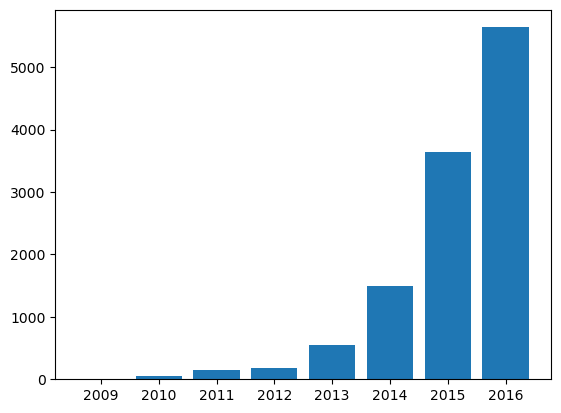

In [39]:
plt.bar(Nr_my.year  , Nr_my.comments)

# time series analysis by month  ( 2016)

In [40]:
df_16 = df[df["year"]== 2016]
df_16

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
171,1178162,58713980,2016-01-03,5967817,Peter,Was able to score this place at the last minut...,Satisfait,3.318056,3.963999,No Comeback,0.327222,3,2016,1
172,1178162,59178493,2016-01-07,40707505,Shihkai,Good house and clean room! Awesome\n,Très Satisfait,4.298611,3.830506,Comeback,0.719444,4,2016,1
173,1178162,59434723,2016-01-10,52937879,Chris,"Great room, had all necessities that we needed...",Très Satisfait,4.750000,3.319699,Comeback,0.900000,4,2016,1
174,1178162,60099509,2016-01-18,50576464,Jose,Very good,Très Satisfait,4.775000,3.163152,Comeback,0.910000,4,2016,1
175,1178162,60247907,2016-01-20,41413549,Shelby,Our stay was great! We arrived much later than...,Satisfait,3.721354,2.355716,Comeback,0.488542,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,No Comeback,0.000000,2,2016,6
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,No Comeback,0.218483,3,2016,7
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,Comeback,0.381515,3,2016,7
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,No Comeback,0.328030,3,2016,8


Nber_RM = pd.pivot_table(df_16,
                         values = 'comments',
                        index = "month",
                        aggfunc = 'nunique').reset_index()
Nber_RM

In [45]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4,2013,5
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521,3,2013,6
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,No Comeback,0.000000,2,2016,6
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,No Comeback,0.218483,3,2016,7
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,Comeback,0.381515,3,2016,7
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,No Comeback,0.328030,3,2016,8


In [46]:
#  the distribution of Satisfaction_Score_5

In [47]:
X= df.Satisfaction_Score_5
X

0        3.470052
1        4.000000
2        3.001302
3        3.458333
4        3.666667
           ...   
68270    2.500000
68271    3.046207
68272    3.453788
68273    3.320076
68274    3.394583
Name: Satisfaction_Score_5, Length: 68222, dtype: float64

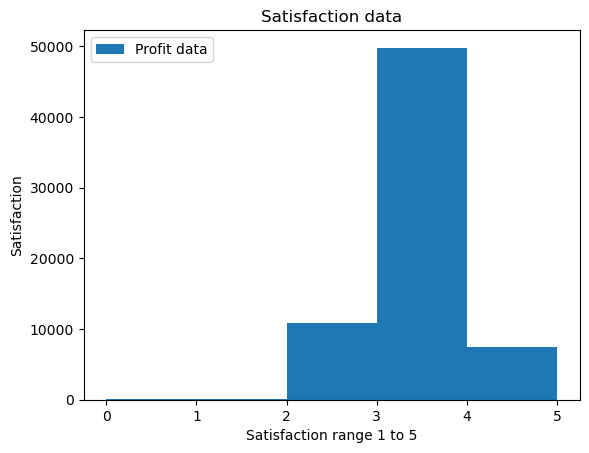

In [51]:
X= df.Satisfaction_Score_5

labels = ['low', 'average', 'Good', 'very good', 'Excellent']

ranges =  [0,    1,    2,   3,    4,     5]

plt.hist(X, ranges, label = 'Satis data')



plt.xlabel('Satisfaction range 1 to 5')
plt.ylabel('Satisfaction')
plt.legend(loc='upper left')
plt.xticks(ranges)
plt.title('Satisfaction data')
plt.show()

In [56]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68222 entries, 0 to 68274
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   listing_id              68222 non-null  int64         
 1   id                      68222 non-null  int64         
 2   date                    68222 non-null  datetime64[ns]
 3   reviewer_id             68222 non-null  int64         
 4   reviewer_name           68222 non-null  object        
 5   comments                68222 non-null  object        
 6   Satisfaction_Livel      68222 non-null  object        
 7   Satisfaction_Score_5    68222 non-null  float64       
 8   Recommandation_Score_5  68222 non-null  float64       
 9   Comeback                68222 non-null  object        
 10  polarity                68222 non-null  float64       
 11  polarity_level          68222 non-null  category      
 12  year                    68222 non-null  int32      

In [ ]:
df["year"] = df['date']

In [ ]:
rofitList = df ['total_profit'].tolist()

labels = ['very low','low', 'average', 'Good', 'very good', 'Excellent']

profit_range = [175000, 200000, 225000, 250000, 300000, 350000]

plt.hist(profitList, profit_range, label = 'Profit data')

plt.xlabel('profit range in dollar')
plt.ylabel('Actual Profit in dollar')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')
plt.show()

In [52]:
# Customer return frequency: Use bar or histograms to visualize
# the number of customers likely to return by year 
df.columns 

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [55]:
df_back = df[df['Comeback']== "Comeback"]
df_back

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4,2013,5
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3,2013,6
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...,Satisfait,3.761905,2.738177,Comeback,0.504762,4,2013,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68263,7462268,76093660,2016-05-24,60469842,Pratik,The host precontacted us about our arrival and...,Satisfait,3.775000,3.399632,Comeback,0.510000,4,2016,5
68265,7462268,77462545,2016-06-01,39288324,Morgan,Joe was a great host. The room was clean and w...,Satisfait,3.803125,3.715575,Comeback,0.521250,4,2016,6
68267,7462268,78042805,2016-06-05,20150719,Yuki,Joe is a flexible and helpful host. His place ...,Satisfait,3.513333,2.844516,Comeback,0.405333,3,2016,6
68269,7462268,79199165,2016-06-11,66618882,Darci,Wonderful location. Bus stop right at the corn...,Très Satisfait,4.077381,2.664863,Comeback,0.630952,4,2016,6


In [53]:
df.Comeback.unique()

array(['Comeback', 'No Comeback'], dtype=object)

In [58]:
df["year"] =  df['date'].dt.year
df["month"] =  df['date'].dt.month

In [68]:
Client_year = pd.pivot_table(df_back,
                            values = ("reviewer_id"),
                            index = "year",
                            aggfunc = "count").reset_index()
Client_year

,year,reviewer_id
0,2009,14
1,2010,106
2,2011,316
3,2012,638
4,2013,1443
5,2014,4502
6,2015,11647
7,2016,15209


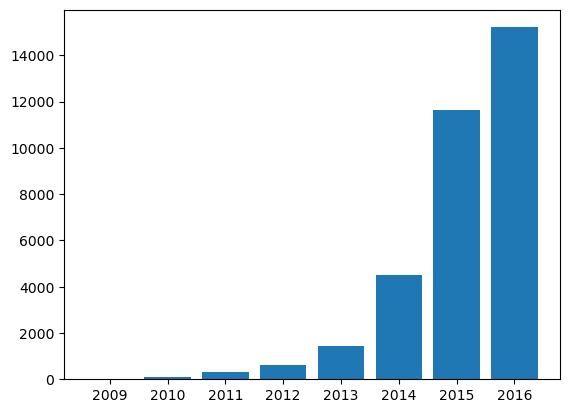

In [64]:
plt.bar(Client_year['year']  , Client_year["reviewer_id"]);



# Booking trends: Create a timeline (by month / year visualization to 
# show peak and low seasons for bookings.

In [74]:
df_15 = df[df['year']== 2015]
df_15

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
83,1178162,25051451,2015-01-05,24947394,Anna,"Una casa muy acogedora, muy cerca (a menos de ...",Neutre,2.500000,2.546968,No Comeback,0.000000,2,2015,1
84,1178162,26035843,2015-02-01,26447420,Patrick,The space was extremely comfortable and very c...,Satisfait,3.386905,2.879873,No Comeback,0.354762,3,2015,2
85,1178162,26147544,2015-02-04,5337984,Javier,"Even though I never got to meet Izzy, the whol...",Satisfait,3.254630,2.035458,No Comeback,0.301852,3,2015,2
86,1178162,26173195,2015-02-05,8479064,Iyann,I had to book a last minute stay the day befor...,Neutre,2.711458,2.910218,No Comeback,0.084583,3,2015,2
87,1178162,26512707,2015-02-14,21650503,Alexandra,We stayed with Izzy just for one night because...,Satisfait,3.525000,3.771423,Comeback,0.410000,3,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68243,7462268,39468374,2015-07-23,13413108,Daniel,Yi was an excellent host and my experience at ...,Satisfait,3.763131,3.935086,Comeback,0.505253,4,2015,7
68244,7462268,39879632,2015-07-26,36144277,Carlos,Yi is a friendly guy. If I had any questions o...,Neutre,3.161111,3.555724,No Comeback,0.264444,3,2015,7
68245,7462268,42736013,2015-08-15,39342838,Krysten,Yi was a great host. He was responsive and hel...,Satisfait,3.632500,4.050109,Comeback,0.453000,3,2015,8
68246,7462268,43471157,2015-08-19,37540760,Yi,The host canceled this reservation 13 days bef...,Neutre,2.500000,1.615279,No Comeback,0.000000,2,2015,8


In [79]:
Client_month = pd.pivot_table(df_15,
                            values = ("reviewer_id"),
                            index = "month",
                            aggfunc = "count").reset_index()


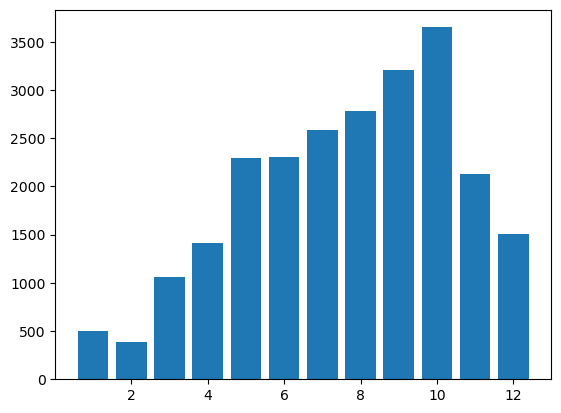

In [81]:
plt.bar(Client_month.month  , Client_month.reviewer_id);

In [87]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

In [ ]:
# Sentiment comparison by host: Present sentiment scores by host
# to identify the most appreciated hosts.

In [84]:
len(df.listing_id.unique())

2829

In [97]:
Pol_Host = pd.pivot_table(df,
                         values = "polarity",
                         index = 'listing_id',
                         aggfunc ="mean").reset_index()

TOP10 =  Pol_Host.sort_values(by='polarity', ascending=False).head(10)


TOP10.reset_index()

,index,listing_id,polarity
0,2219,12368082,1.00000
1,2505,13477535,1.00000
2,2539,13586128,1.00000
3,2524,13532311,1.00000
4,1778,9470342,0.96875
5,51,54487,0.90000
6,1983,10860611,0.87500
7,1822,9723217,0.80000
8,859,4759640,0.80000
9,2730,14336348,0.80000


# Modeling customer return: 
# Use satisfaction and recommendation scores 
# and others variables to predict the (Comeback)

# Y ( 0, 1)  = fuction ( sat rate , recon rate,  xxxxxxxxxxx)

# 1 transforme the comback columns to (0,1)

#  2 to get dumies the satisfaction livel 
# on 4 new columns with (0, 1) 

# 3 to determine x and y
#  Y = df.comeback_bin ( 0,1)
#   X  = df.drop ( befor satisfaction rate or livel  )
#  listing_id , id , date , reviewer_id , reviewer_name , comments

#  step 4  to performmmmmm yourrrrrr MLLLLLLLLL

In [310]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

In [228]:
df.Comeback

0           Comeback
1           Comeback
2        No Comeback
3           Comeback
4           Comeback
            ...     
68270    No Comeback
68271    No Comeback
68272       Comeback
68273    No Comeback
68274    No Comeback
Name: Comeback, Length: 68222, dtype: object

In [99]:
df1 = df
df1

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,Comeback,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,Comeback,0.600000,4,2013,5
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,No Comeback,0.200521,3,2013,6
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,Comeback,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,Comeback,0.466667,3,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,No Comeback,0.000000,2,2016,6
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,No Comeback,0.218483,3,2016,7
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,Comeback,0.381515,3,2016,7
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,No Comeback,0.328030,3,2016,8


In [100]:
# to transform the comebac column
df1['Comeback'] = df1['Comeback'].map({'Comeback': 1, 'No Comeback': 0})

In [101]:
df1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,1,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,1,0.600000,4,2013,5
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,0,0.200521,3,2013,6
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,1,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,1,0.466667,3,2013,6


In [314]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

In [151]:
df1.Satisfaction_Livel.unique()

array(['Satisfait', 'Neutre', 'Très Satisfait', 'Négatif'], dtype=object)

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68222 entries, 0 to 68274
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   listing_id              68222 non-null  int64         
 1   id                      68222 non-null  int64         
 2   date                    68222 non-null  datetime64[ns]
 3   reviewer_id             68222 non-null  int64         
 4   reviewer_name           68222 non-null  object        
 5   comments                68222 non-null  object        
 6   Satisfaction_Livel      68222 non-null  object        
 7   Satisfaction_Score_5    68222 non-null  float64       
 8   Recommandation_Score_5  68222 non-null  float64       
 9   Comeback                68222 non-null  int64         
 10  polarity                68222 non-null  float64       
 11  polarity_level          68222 non-null  category      
 12  year                    68222 non-null  int32      

In [104]:
df1= pd.get_dummies(df1, columns=['Satisfaction_Livel'], dtype =int )

In [105]:
df1.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Score_5', 'Recommandation_Score_5', 'Comeback',
       'polarity', 'polarity_level', 'year', 'month',
       'Satisfaction_Livel_Neutre', 'Satisfaction_Livel_Négatif',
       'Satisfaction_Livel_Satisfait', 'Satisfaction_Livel_Très Satisfait'],
      dtype='object')

In [317]:
df1.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Score_5', 'Recommandation_Score_5', 'Comeback',
       'polarity', 'polarity_level', 'year', 'month',
       'Satisfaction_Livel_Neutre', 'Satisfaction_Livel_Négatif',
       'Satisfaction_Livel_Satisfait', 'Satisfaction_Livel_Très Satisfait'],
      dtype='object')

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [119]:
# Define X as features and y as the target commeback variable

X= df1[[ 'Satisfaction_Score_5', 'Recommandation_Score_5', 
       'polarity', 'polarity_level', 'Satisfaction_Livel_Neutre', 
       'Satisfaction_Livel_Négatif','Satisfaction_Livel_Satisfait',
       'Satisfaction_Livel_Très Satisfait']]

y = df1[ 'Comeback']

In [120]:
# We split the dataset into 80% training and 20% testing
# 我们将数据集分为80％的训练和20％的测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [121]:
# Initialize the logistic regression model
# 初始化逻辑回归模型
logit_model = LogisticRegression()

# Train the model with training data
# 使用训练数据训练模型
logit_model.fit(X_train, y_train)

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:

# Predict on the test set and calculate accuracy
# 在测试集上进行预测并计算准确率
y_pred_test = logit_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display classification report for detailed evaluation
# 显示分类报告以进行详细评估
classification_rep = classification_report(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("*************************************************")
print("Classification Report:\n", classification_rep)

Test Accuracy: 0.9991791744840526
*************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8603
           1       1.00      1.00      1.00      8453

    accuracy                           1.00     17056
   macro avg       1.00      1.00      1.00     17056
weighted avg       1.00      1.00      1.00     17056



In [116]:
# Initialize and train the logistic regression model
# 初始化并训练逻辑回归模型
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

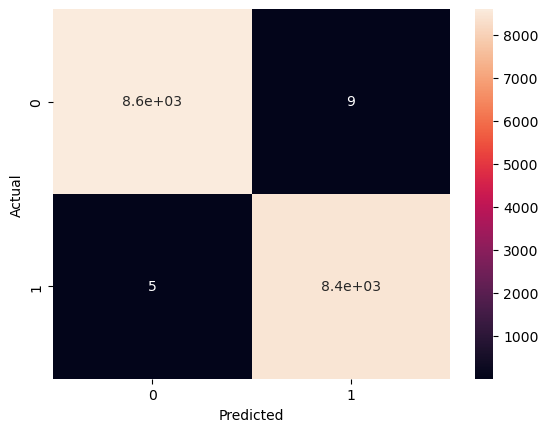

In [117]:
# Display the accuracy and detailed classification report
# 显示准确率和详细的分类报告
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [118]:
import statsmodels.api as sm

# Fit the logistic regression model using statsmodels
# 使用statsmodels拟合逻辑回归模型
model = sm.Logit(y_train, X_train)
result = model.fit()

# Display the summary of the model
# 显示模型的摘要
print(result.summary())

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [346]:
#find what parameters or features occurs in our model
features_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False) 
print(feature_imp)

polarity                  0.457906
Satisfaction_Score_5      0.434970
Comeback                  0.059404
polarity_level            0.034258
Recommandation_Score_5    0.013462
dtype: float64


In [327]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,1,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,1,0.600000,4,2013,5
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,0,0.200521,3,2013,6
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,1,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,1,0.466667,3,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,0,0.000000,2,2016,6
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,0,0.218483,3,2016,7
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,1,0.381515,3,2016,7
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,0,0.328030,3,2016,8


# Factors affecting satisfaction: Analyze which factors most influence
# satisfaction scores and Satisfaction_Livel 

In [247]:
df.Satisfaction_Livel.unique()

array(['Satisfait', 'Neutre', 'Très Satisfait', 'Négatif'], dtype=object)

In [328]:
df2 = df
df2

,listing_id,id,date,reviewer_id,reviewer_name,comments,Satisfaction_Livel,Satisfaction_Score_5,Recommandation_Score_5,Comeback,polarity,polarity_level,year,month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Satisfait,3.470052,3.896255,1,0.388021,3,2013,5
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Satisfait,4.000000,2.959623,1,0.600000,4,2013,5
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Neutre,3.001302,3.443672,0,0.200521,3,2013,6
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Satisfait,3.458333,2.084004,1,0.383333,3,2013,6
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Satisfait,3.666667,2.275422,1,0.466667,3,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,Neutre,2.500000,1.634351,0,0.000000,2,2016,6
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,Neutre,3.046207,3.524519,0,0.218483,3,2016,7
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,Satisfait,3.453788,2.608931,1,0.381515,3,2016,7
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,Satisfait,3.320076,3.665444,0,0.328030,3,2016,8


In [329]:
# to transform the Satisfaction_Livel column
df2['Satisfaction_Livel'] = df2['Satisfaction_Livel'].map({'Négatif': 1,
                                                           'Neutre': 2,
                                                           'Satisfait': 3,
                                                           'Très Satisfait':4 })

In [330]:
df2.Satisfaction_Livel


0        3
1        3
2        2
3        3
4        3
        ..
68270    2
68271    2
68272    3
68273    3
68274    3
Name: Satisfaction_Livel, Length: 68222, dtype: int64

In [331]:
df2.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'Satisfaction_Livel', 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level', 'year', 'month'],
      dtype='object')

In [338]:
y = df2['Satisfaction_Livel']
X =df2[[ 'Satisfaction_Score_5', 'Recommandation_Score_5',
       'Comeback', 'polarity', 'polarity_level'  ]]

In [339]:
# Split data into 80% training and 20% testing sets
# 将数据分为 80% 的训练集和 20% 的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [342]:

# Initialize the Random Forest classifier
# 初始化随机森林分类器
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
# 在训练数据上训练模型
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [343]:

# Predict on the test set and calculate accuracy
# 在测试集上进行预测并计算准确率
y_pred_test = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display classification report for detailed evaluation
# 显示分类报告以便进行详细评估
classification_rep = classification_report(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print('*****************************************************')
print("Classification Report:\n", classification_rep)

Test Accuracy: 0.9960425064126054
*****************************************************
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00      4526
           3       1.00      1.00      1.00      7635
           4       0.99      0.99      0.99      1456

    accuracy                           1.00     13645
   macro avg       1.00      1.00      1.00     13645
weighted avg       1.00      1.00      1.00     13645



In [344]:
#Apply random forest
#we use RandomForestClassifier because in our dataset Productivity it's classify the value into  good or bad
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=10, random_state=30)



#fit data
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

#Predict our dataset
prediction_test = model.predict(X_test)
print(prediction_test)
len(prediction_test)

[2 3 4 ... 2 3 2]


13645

In [345]:
#find our prediction accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

print ('****************************************************')

#find what parameters or features occurs in our model
features_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False) 
print(feature_imp)

Accuracy =  0.9960425064126054
****************************************************
polarity                  0.457906
Satisfaction_Score_5      0.434970
Comeback                  0.059404
polarity_level            0.034258
Recommandation_Score_5    0.013462
dtype: float64
